In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'D:\3\0 Data Analyst\Uci dataset\FOB Analysis.xlsx')

In [3]:
df.head()

,PG NO,Buyer,STYLE,SPMNT,Year,PO,COLOR,OR. QTY,PACK,SPMNT QTY,SHORT QTY,PLUS QTY,CTN QTY,FOB $,TTL FOB $
0,B1269,BSK,CHAPULIN CHEST PRINT,2024-01-01,2023-2024,36217-01,RED,5000.0,Normal,5074,0.0,74.0,29.0,1.5,7611.0
1,B1292,BSK,PEREZOSO,2024-01-14,2023-2024,36252-01,WHITE OFF,7208.0,Normal,7047,161.0,0.0,90.0,1.9,13389.3
2,B1269,BSK,CHAPULIN CHEST PRINT,2024-01-14,2023-2024,36224-01,GRIS PLAN,18427.0,Normal,18680,0.0,253.0,101.0,1.5,28020.0
3,B1269,BSK,CHAPULIN CHEST PRINT,2024-01-14,2023-2024,36225-01,GRIS PLAN,7889.0,Normal,7875,14.0,0.0,45.0,1.5,11812.5
4,B1292,BSK,PEREZOSO,2024-01-18,2023-2024,36255-01,BLACK,4403.0,Normal,4403,0.0,0.0,53.0,1.9,8365.7


In [4]:
df.shape

(92621, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92621 entries, 0 to 92620
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   PG NO      92621 non-null  object        
 1   Buyer      92621 non-null  object        
 2   STYLE      92621 non-null  object        
 3   SPMNT      92621 non-null  datetime64[ns]
 4   Year       92621 non-null  object        
 5   PO         92621 non-null  object        
 6   COLOR      92621 non-null  object        
 7   OR. QTY    92611 non-null  float64       
 8   PACK       69126 non-null  object        
 9   SPMNT QTY  92621 non-null  int64         
 10  SHORT QTY  92611 non-null  float64       
 11  PLUS QTY   92611 non-null  float64       
 12  CTN  QTY   92620 non-null  float64       
 13  FOB $      92621 non-null  float64       
 14  TTL FOB $  92621 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(7)
memory usage: 10.6+ MB


In [6]:
df.isna().sum()

PG NO            0
Buyer            0
STYLE            0
SPMNT            0
Year             0
PO               0
COLOR            0
OR. QTY         10
PACK         23495
SPMNT QTY        0
SHORT QTY       10
PLUS QTY        10
CTN  QTY         1
FOB $            0
TTL FOB $        0
dtype: int64

In [7]:
df = df.drop(['PG NO','PACK' , 'STYLE' , 'PO' , 'COLOR'] , axis=1)

In [8]:
df = df.dropna(axis=0)

In [9]:
df.isna().sum()

Buyer        0
SPMNT        0
Year         0
OR. QTY      0
SPMNT QTY    0
SHORT QTY    0
PLUS QTY     0
CTN  QTY     0
FOB $        0
TTL FOB $    0
dtype: int64

In [10]:
df.shape

(92610, 10)

In [11]:
df.head()

,Buyer,SPMNT,Year,OR. QTY,SPMNT QTY,SHORT QTY,PLUS QTY,CTN QTY,FOB $,TTL FOB $
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7


In [12]:
df.columns = df.columns.str.replace(' ' , '_').str.title()

In [13]:
df.describe()

,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$
count,92610.000000,92610.000000,92610.000000,92610.000000,92610.000000,92610.000000,92610.000000
mean,1478.965015,1324.184246,7.353202,16.185196,25.025051,2.864835,3785.481947
std,3406.974899,2881.334863,103.610802,186.045441,107.070296,2.014964,8836.366452
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.820000,1.490000
25%,129.000000,108.000000,0.000000,0.000000,0.000000,1.590000,240.490000
50%,439.000000,391.000000,0.000000,0.000000,4.000000,2.150000,982.800000
75%,1290.000000,1200.000000,0.000000,2.000000,16.000000,3.460000,3363.255000
max,100134.000000,97502.000000,17560.000000,21391.000000,6179.000000,20.850000,429647.600000


In [14]:
a = df.describe(include='object').columns
for col in a:
    print(col)  
    print('-'*50)
    print(df[col].unique())
    print('.'*50)
    print(df[col].nunique())
    print('*'*50)

Buyer
--------------------------------------------------
['BSK' 'NL' 'AS' 'HM' 'AM' 'SAINS' 'PM' 'MO' 'VNR' 'MANGO' 'ZM' 'AU' 'COL'
 'GS' 'WS' 'ZA' 'NEXT' 'MW' 'FF' 'SSALT' 'NPLC' 'FD' 'SAINSD' 'JND'
 'MANGOD' 'CLD' 'ZAD' 'DT' 'ND' 'BZ' 'ASD' 'NLD' 'B&B' 'BSKD' 'APO' 'NLOW'
 'WX' 'PB' '2TA']
..................................................
39
**************************************************
Year
--------------------------------------------------
['2023-2024' '2022-2023']
..................................................
2
**************************************************


In [15]:
df.head()

,Buyer,Spmnt,Year,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7


In [16]:
big_buyer_shipment= df.groupby('Buyer')['Spmnt_Qty'].sum().reset_index().sort_values('Spmnt_Qty' , ascending=False)

In [17]:
threshhold = 1000000

In [18]:
big_buyer = big_buyer_shipment[big_buyer_shipment['Spmnt_Qty']>threshhold]

In [19]:
df_new = df[df['Buyer'].isin(big_buyer['Buyer'])]

In [20]:
df_new.head()

,Buyer,Spmnt,Year,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7


In [21]:
df_new.shape

(88895, 10)

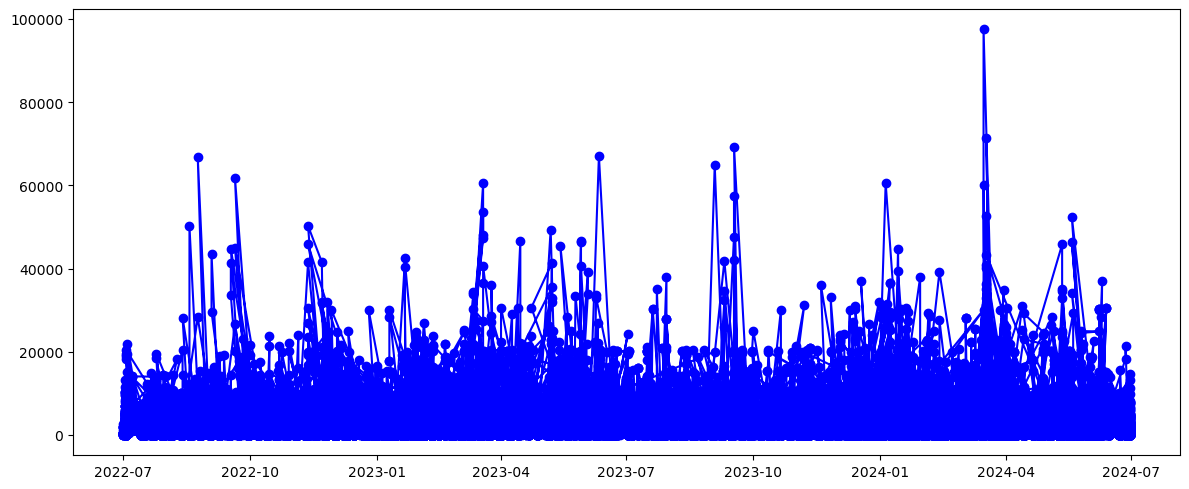

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df_new['Spmnt'] , df_new['Spmnt_Qty'] , marker='o', linestyle='-', color='b')
plt.tight_layout()
plt.show()

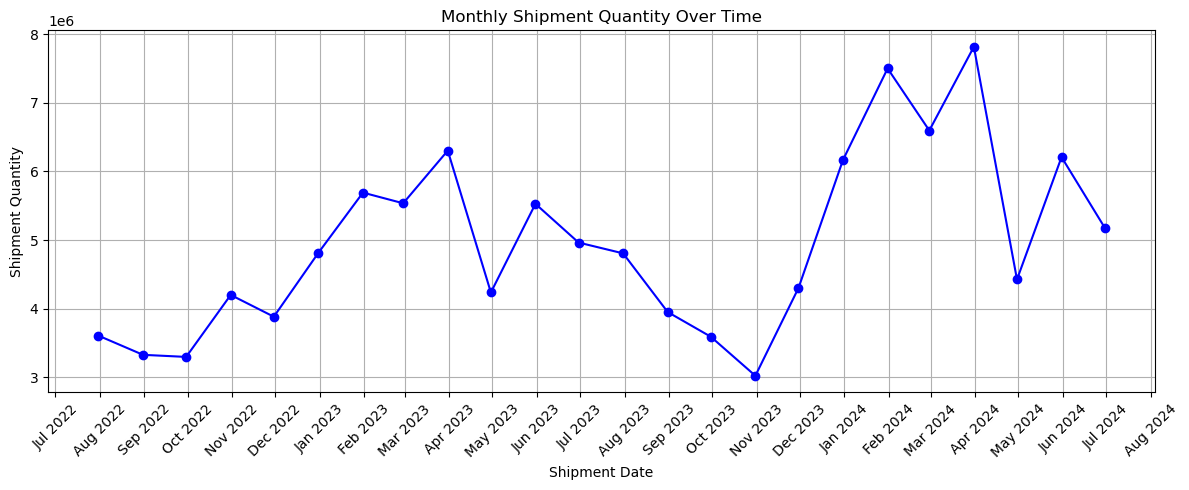

In [23]:
import matplotlib.dates as mdates
df_new_line = df_new.set_index('Spmnt')


monthly_data = df_new_line.resample('M').sum()

plt.figure(figsize=(12, 5))
plt.plot(monthly_data.index, monthly_data['Spmnt_Qty'], marker='o', linestyle='-', color='b')


plt.xlabel('Shipment Date')
plt.ylabel('Shipment Quantity')
plt.title('Monthly Shipment Quantity Over Time')

plt.xticks(monthly_data.index[-24:], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

                                    
plt.grid(visible=True)
plt.tight_layout()
plt.show()


In [24]:
df_new.head()

,Buyer,Spmnt,Year,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7


In [25]:
df_new['Week'] = df_new['Spmnt'].dt.strftime('%A')
df_new['Month'] = df_new['Spmnt'].dt.strftime('%B')
df_new['Year_Calender'] = df_new['Spmnt'].dt.year

**Shimpment Trend Comparison**

In [26]:
Year_first = df_new[df_new['Year']=='2023-2024']
Year_Last = df_new[df_new['Year']=='2022-2023']

In [27]:
Year_first_Sum = Year_first.groupby('Month')['Spmnt_Qty'].sum().reset_index()
Year_Last_Sum = Year_Last.groupby('Month')['Spmnt_Qty'].sum().reset_index()

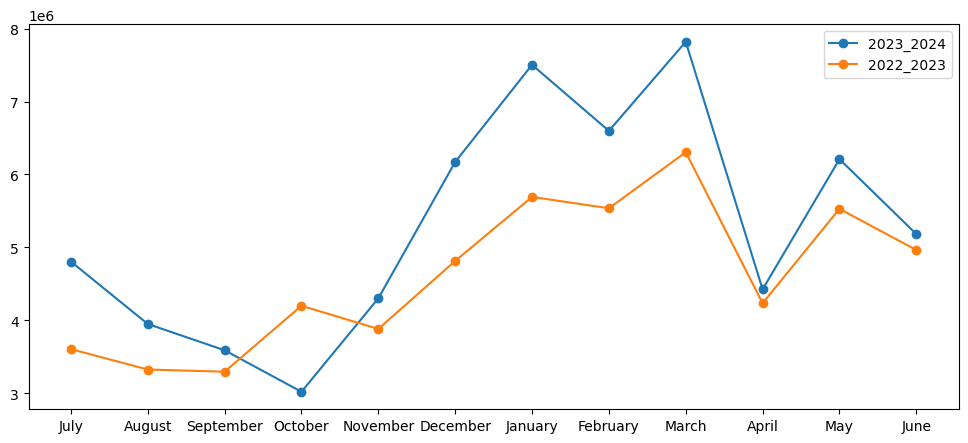

In [28]:
month_order = ['July', 'August', 'September', 'October', 'November', 'December', 
               'January', 'February', 'March', 'April', 'May', 'June']
Year_first_Sum['Month'] = pd.Categorical(Year_first_Sum['Month'], categories=month_order, ordered=True)
Year_Last_Sum['Month'] = pd.Categorical(Year_Last_Sum['Month'], categories=month_order, ordered=True)
Year_first_Sum = Year_first_Sum.sort_values('Month')
Year_Last_Sum = Year_Last_Sum.sort_values('Month')
plt.figure(figsize=(12, 5))
plt.plot(Year_first_Sum['Month'] , Year_first_Sum['Spmnt_Qty'] , marker='o' , label='2023_2024')
plt.plot(Year_Last_Sum['Month'] , Year_Last_Sum['Spmnt_Qty'] , marker='o' , label='2022_2023')
plt.legend()
plt.show()

The increasing trend in sales from October suggests a potential seasonal spike, possibly linked to holiday sales or year-end promotions (e.g., festivals, Black Friday, etc.).

The decreasing trend from April might reflect a post-holiday slowdown or a period of low consumer demand, such as post-fiscal year or summer dip in demand for certain products.

**Shimpment Distribution**

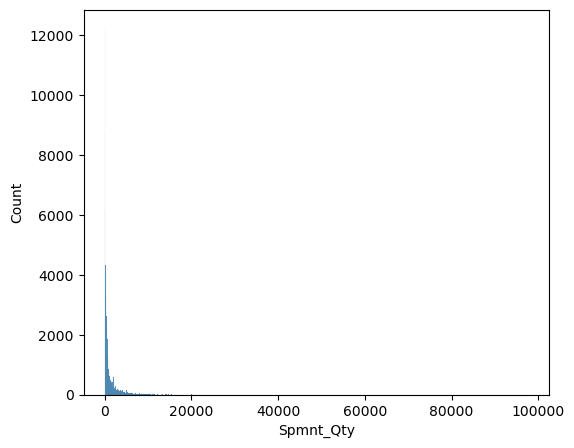

In [29]:
plt.figure(figsize=(6,5))
sns.histplot(data=df_new , x='Spmnt_Qty')
plt.show()

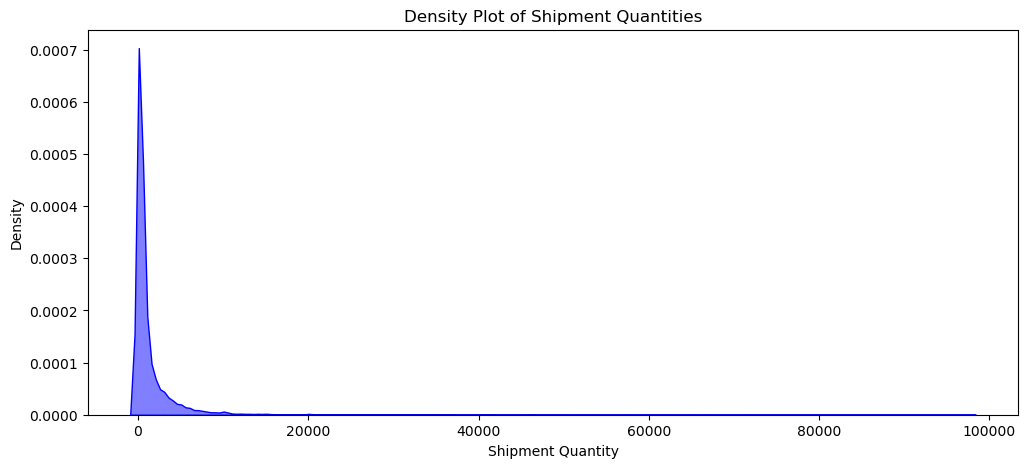

In [30]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=df_new['Spmnt_Qty'], fill=True, color='blue', alpha=0.5)

plt.xlabel('Shipment Quantity')
plt.title('Density Plot of Shipment Quantities')

plt.show()

The right-skew suggests that most shipments are of smaller quantities, with a few exceptional cases involving significantly larger shipments. This could be common in industries where regular, small deliveries are needed to meet consistent demand, but occasionally larger orders are placed.

In [31]:
short_qty_ratio =df_new.groupby('Buyer')[['Short_Qty' , 'Spmnt_Qty']].sum()\
.reset_index().sort_values(by='Short_Qty' , ascending=False)

In [32]:
short_qty_ratio['Percent'] = short_qty_ratio['Short_Qty']/short_qty_ratio['Spmnt_Qty']*100

In [33]:
short_qty_ratio

,Buyer,Short_Qty,Spmnt_Qty,Percent
2,BSK,106132.0,15377446,0.690180
8,SAINS,104145.0,18655999,0.558239
4,MANGO,89015.0,10552475,0.843546
13,ZM,69042.0,5702417,1.210750
0,AS,48485.0,7982389,0.607400
7,PM,44400.0,6523870,0.680578
5,MANGOD,27441.0,1817845,1.509535
6,NL,23720.0,7144594,0.331999
10,VNR,23073.0,5048338,0.457042
1,AU,21834.0,2530525,0.862825


In [34]:
pivot_table = df_new.pivot_table(
    index='Buyer',
    columns='Year',
    values=['Short_Qty', 'Spmnt_Qty'],
    aggfunc='sum',
    fill_value=0
)

In [35]:
pivot_table[('Short_Shipment_Percent', '2022-2023')] = (
    pivot_table[('Short_Qty', '2022-2023')] / pivot_table[('Spmnt_Qty', '2022-2023')] * 100
).fillna(0)

pivot_table[('Short_Shipment_Percent', '2023-2024')] = (
    pivot_table[('Short_Qty', '2023-2024')] / pivot_table[('Spmnt_Qty', '2023-2024')] * 100
).fillna(0)

In [36]:
pivot_table.reset_index().sort_values(by=('Short_Qty' , '2022-2023') , ascending=False)

Buyer Short_Qty           Spmnt_Qty           Short_Shipment_Percent  \
Year         2022-2023 2023-2024 2022-2023 2023-2024              2022-2023   
2        BSK     48026     58106   8021064   7356382               0.598748   
13        ZM     47931     21111   2856924   2845493               1.677714   
8      SAINS     45590     58555   9432461   9223538               0.483331   
4      MANGO     33240     55775   4866311   5686164               0.683064   
5     MANGOD     25148      2293    972003    845842               2.587235   
7         PM     19055     25345   1803502   4720368               1.056556   
9     SAINSD      9506      2887    710846    677756               1.337280   
0         AS      8433     40052   3061949   4920440               0.275413   
11        WS      8258      8875    656519    770318               1.257846   
6         NL      7993     15727   3846226   3298368               0.207814   
12        ZA      7859        30    807635    508837               0.973088   
10       VNR      7555     15518   2175522   2872816               0.347273   
1         AU      5058     16776   1238604   1291921               0.408363   
3         HM      3943      3165  14933157  18556444               0.026404   

                
Year 2023-2024  
2     0.789872  
13    0.741910  
8     0.634843  
4     0.980890  
5     0.271091  
7     0.536928  
9     0.425965  
0     0.813992  
11    1.152122  
6     0.476812  
12    0.005896  
10    0.540167  
1     1.298531  
3     0.017056

In [37]:
df_new.head()

,Buyer,Spmnt,Year,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$,Week,Month,Year_Calender
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0,Monday,January,2024
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3,Sunday,January,2024
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0,Sunday,January,2024
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5,Sunday,January,2024
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7,Thursday,January,2024


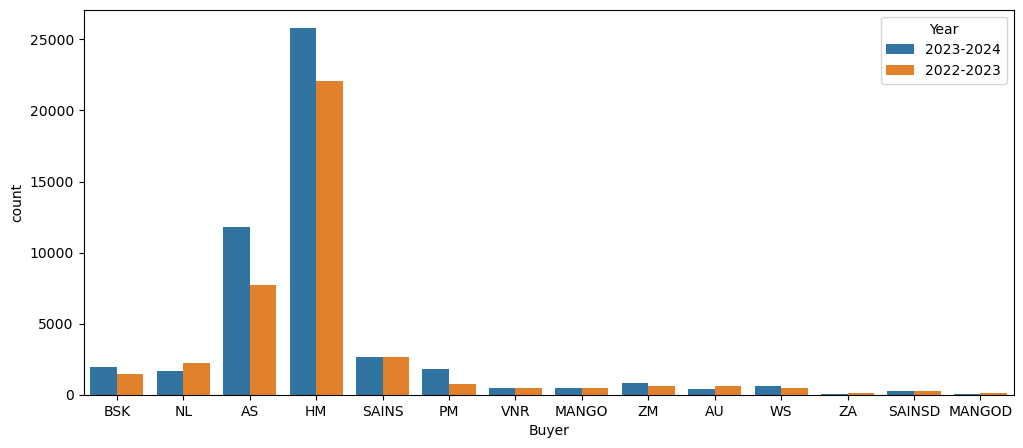

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_new , x='Buyer' , hue='Year')
plt.show()

**Buyerwise Shimpment Comparison**

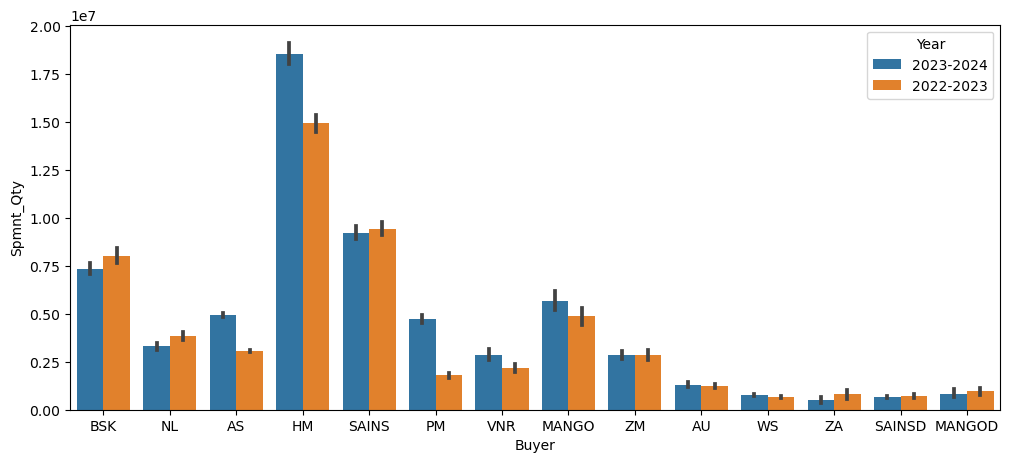

In [39]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_new , x='Buyer' , y='Spmnt_Qty' , estimator=np.sum , hue='Year')
plt.show()

1.The higher shipment volumes for H&M, Sainsbury, and Bershka indicate that these buyers likely place larger or more frequent orders compared to others. This could be due to:

Larger market share or customer base.
Frequent product releases (such as fast fashion for H&M and Bershka).
Consistent demand for replenishing stock (Sainsbury might have high inventory turnover, especially if they're dealing with fast-moving consumer goods).

2.These high volumes may also reflect strong, long-term relationships or contracts between with echotex and these buyers. They could be your key clients, and maintaining such relationships may be crucial for consistent revenue streams. The high shipment volumes may point toward:

Exclusive supply agreements.
Seasonal or periodic spikes in orders based on buyer needs.

**Buyerwise FOB Comparison**

In [40]:
df_new.head()

,Buyer,Spmnt,Year,Or._Qty,Spmnt_Qty,Short_Qty,Plus_Qty,Ctn__Qty,Fob_$,Ttl_Fob_$,Week,Month,Year_Calender
0,BSK,2024-01-01,2023-2024,5000.0,5074,0.0,74.0,29.0,1.5,7611.0,Monday,January,2024
1,BSK,2024-01-14,2023-2024,7208.0,7047,161.0,0.0,90.0,1.9,13389.3,Sunday,January,2024
2,BSK,2024-01-14,2023-2024,18427.0,18680,0.0,253.0,101.0,1.5,28020.0,Sunday,January,2024
3,BSK,2024-01-14,2023-2024,7889.0,7875,14.0,0.0,45.0,1.5,11812.5,Sunday,January,2024
4,BSK,2024-01-18,2023-2024,4403.0,4403,0.0,0.0,53.0,1.9,8365.7,Thursday,January,2024


In [41]:
Buyer_Weighted_Mean = df_new.groupby(['Buyer' , 'Year'])[['Ttl_Fob_$' , 'Spmnt_Qty']].sum().reset_index()

In [42]:
Buyer_Weighted_Mean['Weighted_Fob'] = Buyer_Weighted_Mean['Ttl_Fob_$'] / Buyer_Weighted_Mean['Spmnt_Qty']

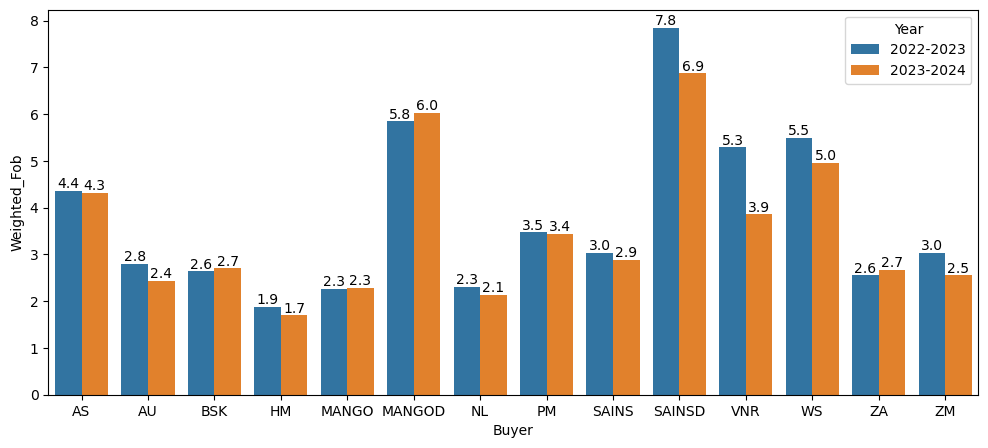

In [43]:
plt.figure(figsize=(12,5))
bar_count = sns.barplot(data=Buyer_Weighted_Mean , x='Buyer' , y='Weighted_Fob' , hue='Year')
for x in bar_count.containers:
    bar_count.bar_label(x , fmt='%.1f')
plt.show()

Increased competition among suppliers driving prices down.

Shifts in fashion trends or economic conditions leading buyers to push for lower FOB prices to maintain their profit margins.

Bulk order agreements, where the higher volume of shipments may have resulted in discounted FOB rates.

1. Process Optimization: To maintain profitability, Echotex might need to optimize operations, improve efficiency, or invest in technology to lower production and operational costs.

2. Diversifying Buyer Base: Relying on a few major buyers that can dictate prices is risky. To counterbalance this, diversifying the buyer base to include smaller or less price-sensitive buyers may help.

**Buyerwise Short Shimpment Comparison**

In [44]:
Buyer_Short_ship = df_new.groupby(['Buyer' , 'Year'])[['Spmnt_Qty' , 'Short_Qty']].sum().reset_index()

In [45]:
Buyer_Short_ship['Short_ship_ratio'] = Buyer_Short_ship['Short_Qty'] / Buyer_Short_ship['Spmnt_Qty']*100

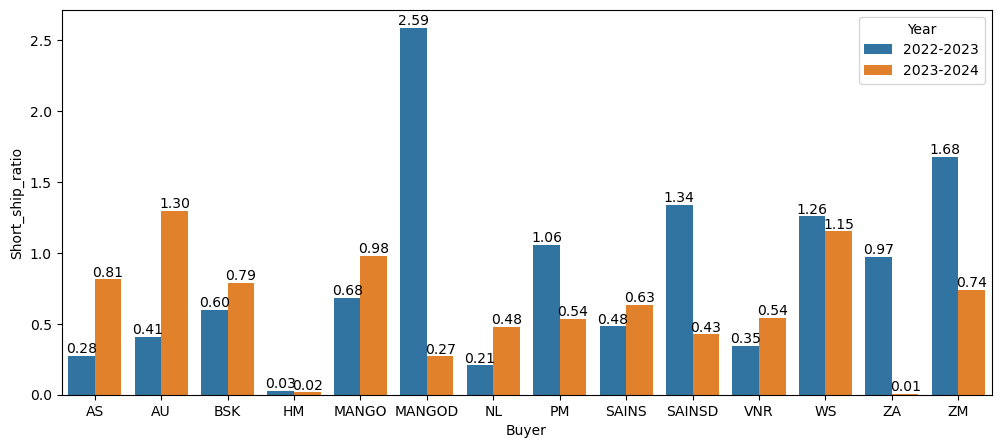

In [46]:
plt.figure(figsize=(12,5))
bar_count = sns.barplot(data=Buyer_Short_ship , x='Buyer' , y='Short_ship_ratio' , hue='Year')
for x in bar_count.containers:
    bar_count.bar_label(x , fmt='%.2f')
plt.show()